## Reading and Plotting Audio Data

In [97]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.io import wavfile
from scipy import signal

In [98]:
sampling_freq, audio = wavfile.read('Chapter07/input_read.wav')

In [78]:
# Print the params
print('Shape:', audio.shape)
print('Datatype:', audio.dtype)
print('Duration:', round(audio.shape[0] / float(sampling_freq), 3), 'seconds')
print('sampling_freq:', sampling_freq)

Shape: (132300,)
Datatype: int16
Duration: 3.0 seconds
sampling_freq: 44100


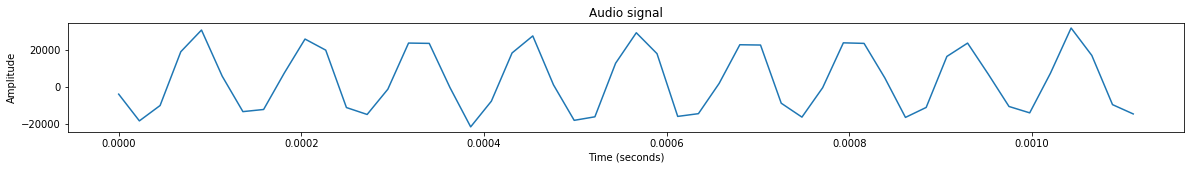

In [79]:
#trail plot of full audio file
# Plot the figure
# from scipy import signal
# >>>
# x = np.linspace(0, 10, 20, endpoint=False)
# y = np.cos(-x**2/6.0)
# f = signal.resample(y, 100)
# xnew = np.linspace(0, 10, 100, endpoint=False)

plt.figure(figsize=(20,2))
plt.plot(np.arange(0, len(audio[:50]), 1)/sampling_freq, audio[:50])  #, color='black') 
# plt.plot(np.arange(0, 800, 1), signal.resample(audio, 800))  #, color='black') 
plt.xlabel('Time (seconds)') 
plt.ylabel('Amplitude')
plt.title('Audio signal') 
plt.show()

# plt.figure()
# plt.plot(x_values, power, color='black') 
# plt.xlabel('Freq (in kHz)') 
# plt.ylabel('Power (in dB)')
# plt.show()

In [80]:
audio[0:100]

array([ -3893, -18346, -10040,  19031,  30756,   5817, -13341, -12186,
         7540,  25887,  19893, -11141, -14877,  -1226,  23718,  23543,
         -323, -21576,  -7695,  18380,  27577,   1135, -18051, -16144,
        12809,  29293,  17989, -15928, -14446,   1885,  22813,  22651,
        -8797, -16310,   -421,  23843,  23543,   4938, -16469, -11080,
        16488,  23696,   6898, -10559, -14007,   7371,  31850,  17033,
        -9565, -14592,   3193,  24274,  27159,   4099, -14011,  -4683,
        17144,  31214,   5078, -17069, -11365,   7298,  30260,  12941,
       -12266, -15625,   4686,  25923,  24322,  -1197, -17533,   -525,
        23848,  27713,   3530, -16844,  -9981,  15892,  32666,   9186,
        -8940, -13433,   3266,  23175,  22814,  -2980, -15609,  -2719,
        26362,  21459,   3988, -15908,  -6949,  14199,  32016,   7855,
       -12703, -13218,   9585,  27470], dtype=int16)

In [81]:
# Normalize the values 
audio = audio / (2.**15)

In [82]:
# Extract first 30 values for plotting 
audio = audio[:30]

In [83]:
audio[0:100]

array([-0.11880493, -0.55987549, -0.30639648,  0.58078003,  0.93859863,
        0.17752075, -0.40713501, -0.37188721,  0.23010254,  0.79000854,
        0.60708618, -0.33999634, -0.45401001, -0.03741455,  0.72381592,
        0.71847534, -0.00985718, -0.65844727, -0.23483276,  0.56091309,
        0.84158325,  0.03463745, -0.5508728 , -0.49267578,  0.39089966,
        0.89395142,  0.54898071, -0.48608398, -0.44085693,  0.05752563])

In [60]:
np.arange(0, len(audio), 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [84]:
# Build the time axis
x_values = np.arange(0, len(audio), 1) / float(sampling_freq)

In [85]:
x_values*1000

array([0.        , 0.02267574, 0.04535147, 0.06802721, 0.09070295,
       0.11337868, 0.13605442, 0.15873016, 0.1814059 , 0.20408163,
       0.22675737, 0.24943311, 0.27210884, 0.29478458, 0.31746032,
       0.34013605, 0.36281179, 0.38548753, 0.40816327, 0.430839  ,
       0.45351474, 0.47619048, 0.49886621, 0.52154195, 0.54421769,
       0.56689342, 0.58956916, 0.6122449 , 0.63492063, 0.65759637])

In [86]:
# Convert to seconds 
x_values *= 1000

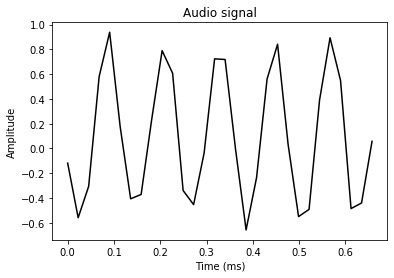

In [87]:
# Plotting the chopped audio signal 
plt.plot(x_values, audio, color='black') 
plt.xlabel('Time (ms)') 
plt.ylabel('Amplitude')
plt.title('Audio signal') 
plt.show()

## Transforming Audio to Frequency Domain

In [ ]:
import numpy as np
from scipy.io import wavfile 
import matplotlib.pyplot as plt

In [ ]:
# Read the input file
sampling_freq, audio = wavfile.read('Chapter07/input_freq.wav')

In [ ]:
print('Shape:', audio.shape)
print('Datatype:', audio.dtype)
print('Duration:', round(audio.shape[0] / float(sampling_freq), 3), 'seconds')
print('sampling_freq:', sampling_freq)

In [ ]:
audio

In [ ]:
# Normalize the values 
audio = audio / (2.**15)

In [ ]:
audio

In [ ]:
# Extract length 
len_audio = len(audio)
print(len_audio)

In [ ]:
# Apply Fourier transform
transformed_signal = np.fft.fft(audio)
half_length = np.ceil((len_audio + 1) / 2.0) 
transformed_signal = abs(transformed_signal[0:int(half_length)]) 
transformed_signal /= float(len_audio)
transformed_signal **= 2

In [ ]:
# Extract length of transformed signal 
len_ts = len(transformed_signal)
print(len_ts)

In [ ]:
# Take care of even/odd cases
if len_audio % 2:
    transformed_signal[1:len_ts] *= 2 
else:
    transformed_signal[1:len_ts-1] *= 2

In [ ]:
# Extract power in dB
power = 10 * np.log10(transformed_signal)

In [ ]:
#the X-axis is the time axis. We need to scale this according the sampling frequency 
# and then convert this into seconds:
# Build the time axis
x_values = np.arange(0, half_length, 1) * (sampling_freq / len_audio) / 1000.0

In [ ]:
# Plot the figure
plt.figure()
plt.plot(x_values, power, color='black') 
plt.xlabel('Freq (in kHz)') 
plt.ylabel('Power (in dB)')
plt.show()

In [ ]:
# Read the input file
sampling_freq, audio = wavfile.read('Chapter07/input_freq.wav')

# Normalize the values
audio = audio / (2.**15)

# Extract length
len_audio = len(audio)

# Apply Fourier transform
transformed_signal = np.fft.fft(audio)
half_length = np.ceil((len_audio + 1) / 2.0)
transformed_signal = abs(transformed_signal[0:int(half_length)])
transformed_signal /= float(len_audio)
transformed_signal **= 2

# Extract length of transformed signal
len_ts = len(transformed_signal)

# Take care of even/odd cases
if len_audio % 2:
    transformed_signal[1:len_ts] *= 2
else:
    transformed_signal[1:len_ts-1] *= 2

# Extract power in dB
power = 10 * np.log10(transformed_signal)

# Build the time axis
x_values = np.arange(0, half_length, 1) * (sampling_freq / len_audio) / 1000.0

# Plot the figure
plt.figure()
plt.plot(x_values, power, color='black')
plt.xlabel('Freq (in kHz)')
plt.ylabel('Power (in dB)')
plt.show()


## Mel Frequency Cepstral Coefficients (MFCC)
Extracting frequency Domain Features

In [88]:
from python_speech_features import mfcc

In [89]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank

In [90]:
# Read input sound file
sampling_freq, audio = wavfile.read("Chapter07/input_freq.wav")

In [91]:
# Extract MFCC and Filter bank features 
mfcc_features = mfcc(audio, sampling_freq) 
filterbank_features = logfbank(audio, sampling_freq)

In [92]:
# Print parameters
print('\nMFCC:\nNumber of windows =', mfcc_features.shape[0])
print('Length of each feature =', mfcc_features.shape[1])
print('\nFilter bank:\nNumber of windows =', filterbank_features. shape[0])
print('Length of each feature =', filterbank_features.shape[1])


MFCC:
Number of windows = 40
Length of each feature = 13

Filter bank:
Number of windows = 40
Length of each feature = 26


In [94]:
mfcc_features

array([[ 1.38735164e+01, -1.30565576e+01, -1.45441645e+01,
        -7.83853556e+00, -1.37312936e+01, -2.19831308e+00,
        -1.65366823e+01, -5.30263147e-01, -2.38661142e+01,
         9.08502048e+00, -3.62970149e+00,  9.21595081e-01,
        -1.85312579e+01],
       [ 1.70657543e+01, -1.90791108e+01, -3.26619639e+01,
        -2.39148802e+00, -1.76158503e+01,  1.25501669e+01,
        -7.85038876e+00,  9.59351350e+00, -1.50742008e+01,
         2.95954039e+01, -1.63272878e+00, -1.81204930e+01,
         1.94761716e+00],
       [ 1.73738625e+01, -1.25626476e+01, -2.57326143e+01,
         9.86088930e-02, -1.81262427e+01,  1.09225983e+01,
        -1.28550440e+01,  3.55373053e+00, -1.55681337e+01,
         3.12127241e+01,  6.36959255e-01, -1.21985327e+01,
         4.14428715e+00],
       [ 2.05591253e+01, -2.19848723e+01, -3.03900750e+01,
         6.86449796e+00, -1.52821841e+01,  2.20933374e+01,
        -1.32561325e+01,  4.63806688e+00, -2.67074328e+01,
         2.10743125e+01,  1.48890850e

Text(0.5, 1.05, 'MFCC')

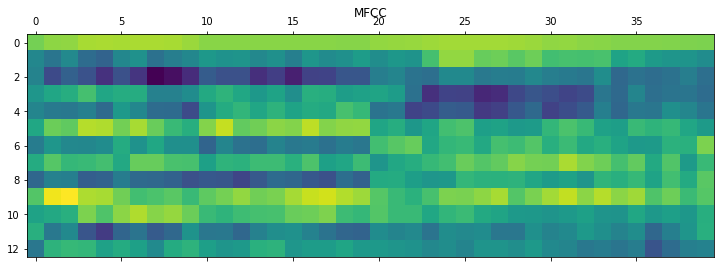

In [96]:
# Plot the features 
mfcc_features = mfcc_features.T 
plt.matshow(mfcc_features) 
plt.title('MFCC')

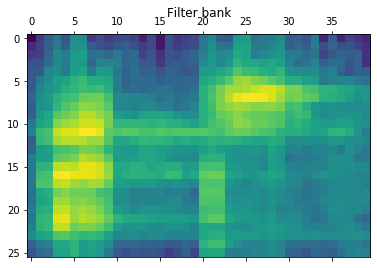

In [93]:
filterbank_features = filterbank_features.T 
plt.matshow(filterbank_features) 
plt.title('Filter bank')
plt.show()

## Building a HMM

In [33]:
import os
import argparse 

import numpy as np
from scipy.io import wavfile 
from hmmlearn import hmm
from python_speech_features import mfcc

In [30]:
# Class to handle all HMM related processing
class HMMTrainer(object):
    def __init__(self, model_name='GaussianHMM', n_components=4, cov_type='diag', n_iter=1000):
        self.model_name = model_name
        self.n_components = n_components
        self.cov_type = cov_type
        self.n_iter = n_iter
        self.models = []

        if self.model_name == 'GaussianHMM':
            self.model = hmm.GaussianHMM(n_components=self.n_components, 
                    covariance_type=self.cov_type, n_iter=self.n_iter)
        else:
            raise TypeError('Invalid model type')

    # X is a 2D numpy array where each row is 13D
    def train(self, X):
        np.seterr(all='ignore')
        self.models.append(self.model.fit(X))

    # Run the model on input data
    def get_score(self, input_data):
        return self.model.score(input_data)

In [36]:
# Function to parse input arguments
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Trains the HMM classifier')
    parser.add_argument("--input-folder", dest="input_folder", required=True,
            help="Input folder containing the audio files in subfolders")
    return parser

In [37]:
args = build_arg_parser().parse_args()
input_folder = args.input_folder

usage: ipykernel_launcher.py [-h] --input-folder INPUT_FOLDER
ipykernel_launcher.py: error: the following arguments are required: --input-folder


SystemExit: 2

In [20]:
# args = build_arg_parser().parse_args()
# input_folder = args.input_folder

hmm_models = []

# Parse the input directory
for dirname in os.listdir(input_folder):
    # Get the name of the subfolder 
    subfolder = os.path.join(input_folder, dirname)

    if not os.path.isdir(subfolder): 
        continue

    # Extract the label
    label = subfolder[subfolder.rfind('/') + 1:]

    # Initialize variables
    X = np.array([])
    y_words = []

    # Iterate through the audio files (leaving 1 file for testing in each class)
    for filename in [x for x in os.listdir(subfolder) if x.endswith('.wav')][:-1]:
        # Read the input file
        filepath = os.path.join(subfolder, filename)
        sampling_freq, audio = wavfile.read(filepath)

        # Extract MFCC features
        mfcc_features = mfcc(audio, sampling_freq)

        # Append to the variable X
        if len(X) == 0:
            X = mfcc_features
        else:
            X = np.append(X, mfcc_features, axis=0)

        # Append the label
        y_words.append(label)

    print('X.shape =', X.shape)
    # Train and save HMM model
    hmm_trainer = HMMTrainer()
    hmm_trainer.train(X)
    hmm_models.append((hmm_trainer, label))
    hmm_trainer = None

usage: ipykernel_launcher.py [-h] --input-folder INPUT_FOLDER
ipykernel_launcher.py: error: the following arguments are required: --input-folder


SystemExit: 2